![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large2.jpg"
    style="width:200px; float: right; margin: 0 40px 40px 40px;"></img>

# Project assignment: US Census Analysis

<i>
> Dataset source: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data <br>
> Dataset description: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
</i>

We will be working with an extraction of data done by Barry Becker from the 1994 Census database.

**[Dataset information and columns](Dataset Info.ipynb)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# magic function that renders the figure in a notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': (18, 6)})

### Loading the Dataset

The data is located in the `data/census-data.csv` CSV file. Take a look at the structure of it and the fields it has. You will notice that **it doesn't have a header**. 

In [3]:
df = pd.read_csv('data/census-data.csv', sep=', ', engine='python', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We used a few special parameters to correctly parse the csv. As the header is missing, pandas is assigning numbers to the columns.

**This is when the fun starts...**
<br><br><br>

---

### Exercise: Rename the columns

Use the names contained in `col_names` to properly name the columns (and replace the numbers). 

In [4]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
             'hours-per-week', 'native-country', 'income']

In [5]:
# Rename the columns
df.columns # printing this confirms the numbers are the column names

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [6]:
df.columns = col_names # set the column names

In [7]:
# Check the df.columns command with the first few rows
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Once everything works, it'll look something like this:

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Exercise: Cleaning the data

You'll notice that some columns have invalid values (`workclass`, `occupation`, and `native-country`).

###### a. What are those invalid values?

Identify the invalid values of `workclass` (spoiler, it's a `?` question mark):

In [9]:
# Results

In [10]:
# ORIGINAL RESULTS ABOVE, test code below
df.isna() # prints out the whole thing

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df['workclass'].value_counts()  # almost forgot this is a method
# method reveals that there are a ton of question marks (?)
# workclass, occupation, and native-country

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [12]:
df['occupation'].value_counts()  # almost forgot this is a method
# method reveals that there are a ton of question marks (?)
# workclass, occupation, and native-country

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
df['native-country'].value_counts()  # almost forgot this is a method
# method reveals that there are a ton of question marks (?)
# workclass, occupation, and native-country

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [14]:
# df['workclass', 'occupation', 'native-country'].value_counts() # Can't do multiple columns!!!

In [15]:
df[['workclass','occupation']] # no value_counts()

,workclass,occupation
0,State-gov,Adm-clerical
1,Self-emp-not-inc,Exec-managerial
2,Private,Handlers-cleaners
3,Private,Handlers-cleaners
4,Private,Prof-specialty
5,Private,Exec-managerial
6,Private,Other-service
7,Self-emp-not-inc,Exec-managerial
8,Private,Prof-specialty
9,Private,Exec-managerial


In [25]:
# check for NaN
# pandas.isnull --> NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike

df[['workclass','occupation','native-country']].isnull()
# prints the whole set of data?

,workclass,occupation,native-country
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [16]:
df[['workclass','occupation','native-country']].isnull().any()

workclass         False
occupation        False
native-country    False
dtype: bool

###### b. Removing those rows

Your task now is to remove those invalid rows (all the ones containing `?`). There are different ways of doing this, so this is entirely up to you. This is the expected output of your dataframe:

In [17]:
df.replace({
    'workclass': { '?': np.nan },
    'native-country': { '?': np.nan }
}, inplace=True)

# error with all 3?

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 32560
Data columns (total 17 columns):
age               30718 non-null int64
workclass         30718 non-null object
fnlwgt            30718 non-null int64
education         30718 non-null object
education-num     30718 non-null int64
marital-status    30718 non-null object
occupation        30718 non-null object
relationship      30718 non-null object
race              30718 non-null object
sex               30718 non-null object
capital-gain      30718 non-null int64
capital-loss      30718 non-null int64
hours-per-week    30718 non-null int64
native-country    30162 non-null object
income            30718 non-null category
<=50K             30718 non-null uint8
>50K              30718 non-null uint8
dtypes: category(1), int64(6), object(8), uint8(2)
memory usage: 4.9+ MB


In [18]:
df.replace({
    'occupation':{'?',np.nan}
}, inplace=True)

# error with all 3?
# had to run this separately

In [19]:
# My results are below
df.info()

# workclass and native country have less values with the '?'s removed, correct?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [54]:
# Result:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30169 entries, 0 to 32560
Data columns (total 15 columns):
age               30169 non-null int64
workclass         30169 non-null object
fnlwgt            30169 non-null int64
education         30169 non-null object
education-num     30169 non-null int64
marital-status    30169 non-null object
occupation        30169 non-null object
relationship      30169 non-null object
race              30169 non-null object
sex               30169 non-null object
capital-gain      30169 non-null int64
capital-loss      30169 non-null int64
hours-per-week    30169 non-null int64
native-country    30169 non-null object
income            30169 non-null object
dtypes: int64(6), object(9)
memory usage: 4.9+ MB


In [20]:
# stack overflow
# rechecking what's not null
df.isnull().values.any() # nope

True

In [21]:
df.isnull().any() # shows workclass and native-country have some null values

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
income            False
dtype: bool

In [52]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
# DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

# axis : {0 or ‘index’, 1 or ‘columns’}, default 0
# 0, or ‘index’ : Drop rows which contain missing values.
# 1, or ‘columns’ : Drop columns which contain missing value.

# how : {‘any’, ‘all’}, default ‘any’
# Determine if row or column is removed from DataFrame, when we have at least one NA or all NA.
# ‘any’ : If any NA values are present, drop that row or column.
# ‘all’ : If all values are NA, drop that row or column.

# inplace : bool, default False
# If True, do operation inplace and return None.

df.dropna(axis=0,how='any',inplace=True)

In [53]:
# Check the values again
df.info()
# every set now has the same amount of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 17 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null object
income            30162 non-null category
<=50K             30162 non-null uint8
>50K              30162 non-null uint8
dtypes: category(1), int64(6), object(8), uint8(2)
memory usage: 3.5+ MB


In [54]:
df['workclass'].value_counts() # prove that I do not have any question mark values left in the data

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [55]:
df['occupation'].value_counts() # still question marks, why?

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [25]:
df[df['occupation'] == '?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27,54,NaN,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
128,35,NaN,129305,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
149,43,NaN,174662,Some-college,10,Divorced,?,Not-in-family,White,Female,0,0,40,United-States,<=50K
154,52,NaN,252903,HS-grad,9,Divorced,?,Not-in-family,White,Male,0,0,45,United-States,>50K
160,68,NaN,38317,1st-4th,2,Divorced,?,Not-in-family,White,Female,0,0,20,United-States,<=50K
187,53,NaN,135105,Bachelors,13,Divorced,?,Not-in-family,White,Female,0,0,50,United-States,<=50K


In [26]:
df.drop(df[df['occupation'].str.contains('?', regex=False)].index, inplace=True)

In [28]:
df[df['occupation'] == '?'] # Sweet, finally worked.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


### Exercise: Convert `income` to an ordered categorical type

As you'll see, `income` has two values `<=50K` and `>50K`:

In [30]:
df['income'].value_counts() #value counts shows the two categorical values

<=50K    23068
>50K      7650
Name: income, dtype: int64

Your job is to turn them into an **ORDERED** categorical type with the following order: `['<=50K', '>50K']`

In [31]:
# Expected result:
df['income'].dtype

dtype('O')

In [33]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
# import
# instead of passing 'category', 
# use an instance of CategoricalDtype.
from pandas.api.types import CategoricalDtype

In [ ]:
#Initially it's dtype('O') # whatever that means

In [34]:
# create an ordered data type based on the string values found in value_counts()
cat_type = CategoricalDtype(['<=50K', '>50K'], ordered=True)

In [36]:
df['income'] = df['income'].astype(cat_type) # Cast a pandas object to a specified dtype dtype.

In [37]:
df['income'].astype(cat_type).value_counts() # working as prescribed in the solution

<=50K    23068
>50K      7650
Name: income, dtype: int64

In [38]:
df['income'].value_counts() # is astype required here?

<=50K    23068
>50K      7650
Name: income, dtype: int64

### Exercise: Create a dummy variable _">50K"_ or _"<=50K"_ and concatenate them to our dataframe.

In [ ]:
## Note: This means it turns the thing into 0s and 1s

In [39]:
pd.get_dummies(df['income']).head()

,<=50K,>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [40]:
df = pd.concat([df, pd.get_dummies(df['income'])], axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,<=50K,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0


In [ ]:
## Step above added the two new categorical data columns!

In [21]:
# Expected result:

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,<=50K,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0


### Exercise: Plot a **distplot** showing the distribution of `age`.

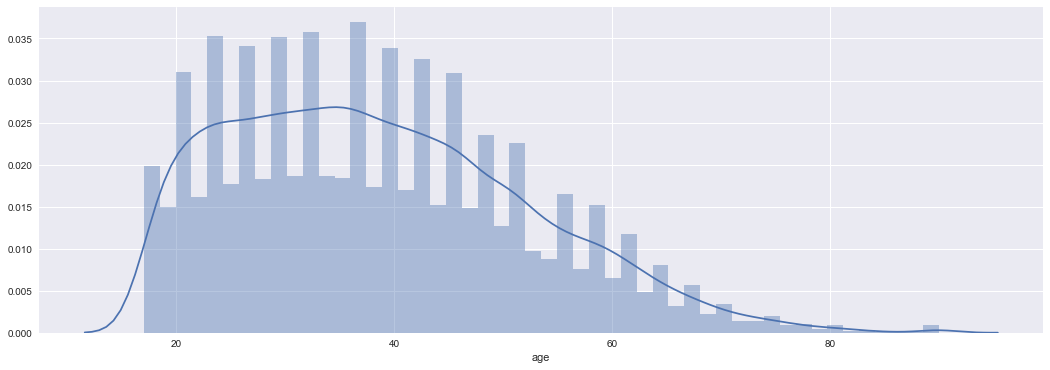

In [57]:
# Expected output

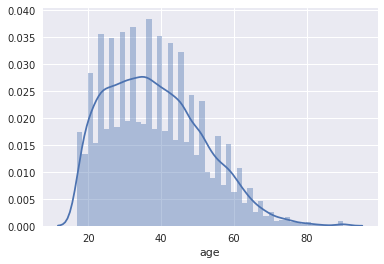

In [41]:
sns.distplot(df['age'])

In [ ]:
# 

### Exercise: Plot a **boxplot** showing the distribution of `age`.

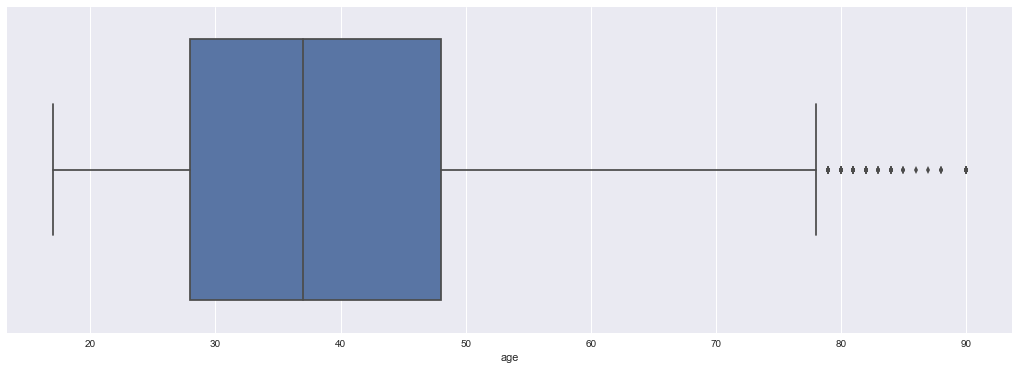

In [56]:
# Expected output

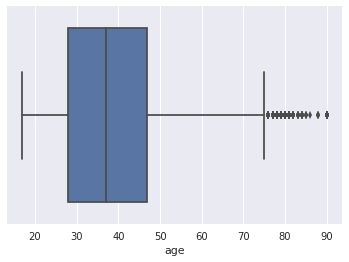

In [45]:
# box plot of age
sns.boxplot(data=df, x='age')

### Exercise: Remove outlier values from `age` and plot the previous boxplot again.

_Suppose values higher than 70 as outliers_.

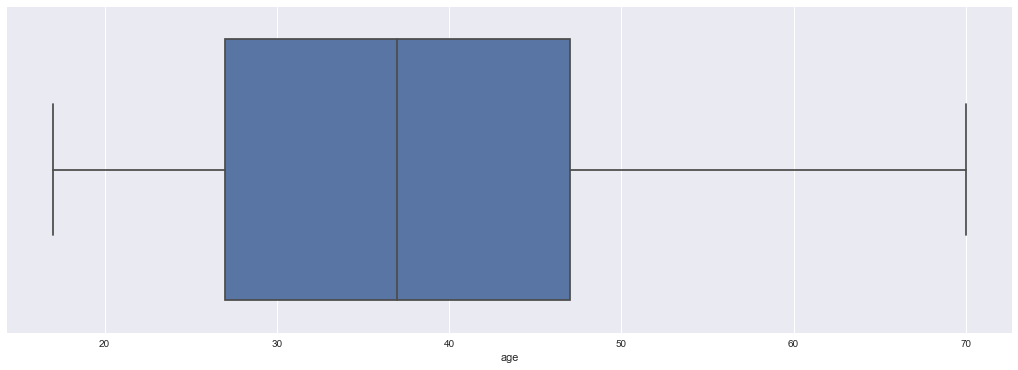

In [54]:
# Expected solution:

In [46]:
df2 = df[df['age'] <= 70] # remove ages above 70 years old by restricting the dataset in df2

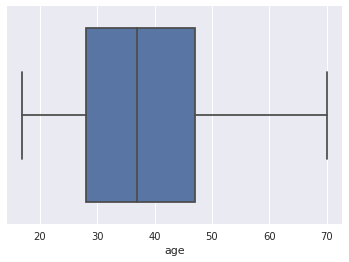

In [47]:
sns.boxplot(data=df2, x='age') # plot df2 age

### Exercise: How many people work more than 20 hours per week?

In [22]:
# Expected output

29633

In [49]:
df.loc[df['hours-per-week'] > 20, 'hours-per-week'].count() # filter for hours above 20

28295

### Exercise: How many men and women are? Show totals and proportion over all the data.

In [25]:
# Expected output

Male count: 21790
Female count: 10771
Male proportion: 0.6692054912318418
Female proportion: 0.33079450876815825


In [50]:
# test of code
sex_column = df["sex"]

num_male = sex_column[sex_column == 'Male'].count()
print("Male count: {}".format(num_male))

num_female = sex_column[sex_column == 'Female'].count()
print("Female count: {}".format(num_female))

total_rows = len(sex_column)

male_prop = num_male / total_rows
print("Male proportion: {}".format(male_prop))

female_prop = num_female / total_rows
print("Female proportion: {}".format(female_prop))

Male count: 20788
Female count: 9930
Male proportion: 0.6767367667165831
Female proportion: 0.3232632332834169


### Exercise: Plot a bar plot showing the income by gender

_Hint: Check [countplots](https://seaborn.pydata.org/tutorial/categorical.html#bar-plots) in Seaborn docs_

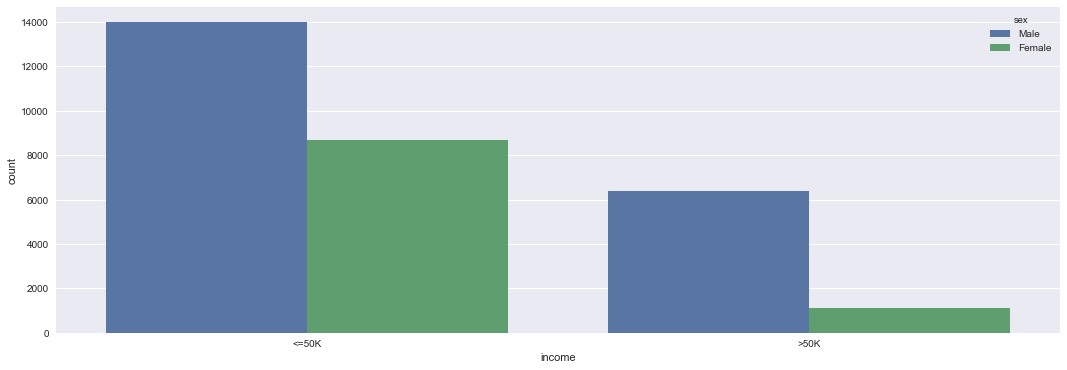

In [65]:
# Expected Result:

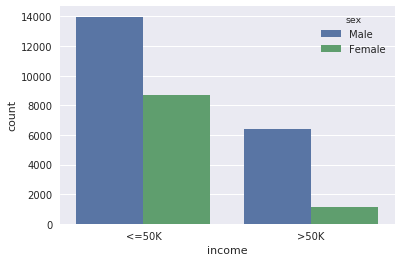

In [56]:
# x axis is income, hue/category is sex
sns.countplot(x='income', hue='sex', data=df)

### Exercise: Create a bar plot showing count of `race`s

It should look like this:

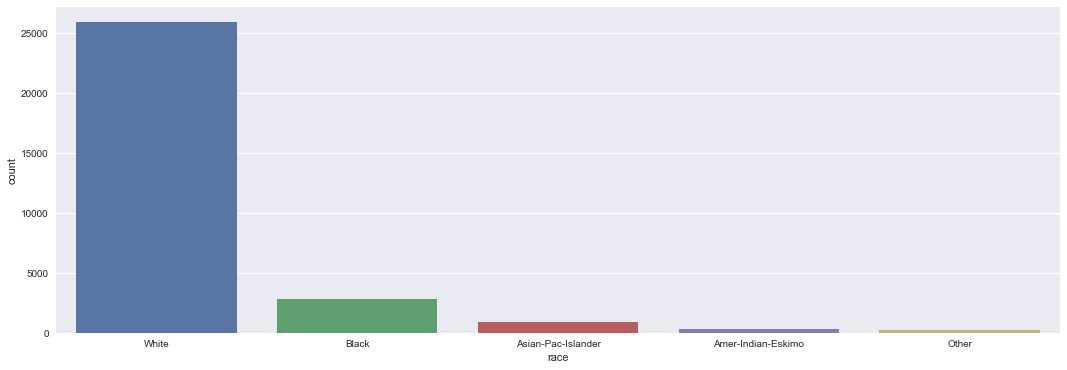

In [84]:
# Expected result

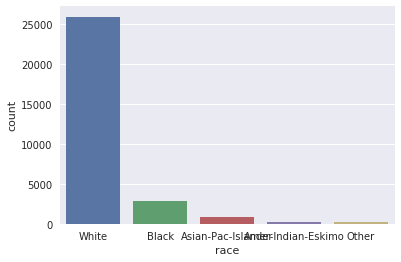

In [57]:
# x axis is race
sns.countplot(x='race', data=df)

### Exercise: Count per `race`

Using grouping and aggregation functions, count how many people are per each race:

In [18]:
# Expected result:

,race,count
0,Amer-Indian-Eskimo,311
1,Asian-Pac-Islander,1039
2,Black,3124
3,Other,271
4,White,27816


In [58]:
df.groupby('race').count()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income,<=50K,>50K
race,,,,,,,,,,,,,,,,
Amer-Indian-Eskimo,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286
Asian-Pac-Islander,895,895,895,895,895,895,895,895,895,895,895,895,895,895,895,895
Black,2817,2817,2817,2817,2817,2817,2817,2817,2817,2817,2817,2817,2817,2817,2817,2817
Other,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231
White,25933,25933,25933,25933,25933,25933,25933,25933,25933,25933,25933,25933,25933,25933,25933,25933


In [59]:
df.groupby('race')['age'].count() # just show age

race
Amer-Indian-Eskimo      286
Asian-Pac-Islander      895
Black                  2817
Other                   231
White                 25933
Name: age, dtype: int64

### Exercise: Create a barplot with the `occupation` column

We want to check the number of people for each `occupation`. In this case, we want to see a nice, sorted plot like this one:

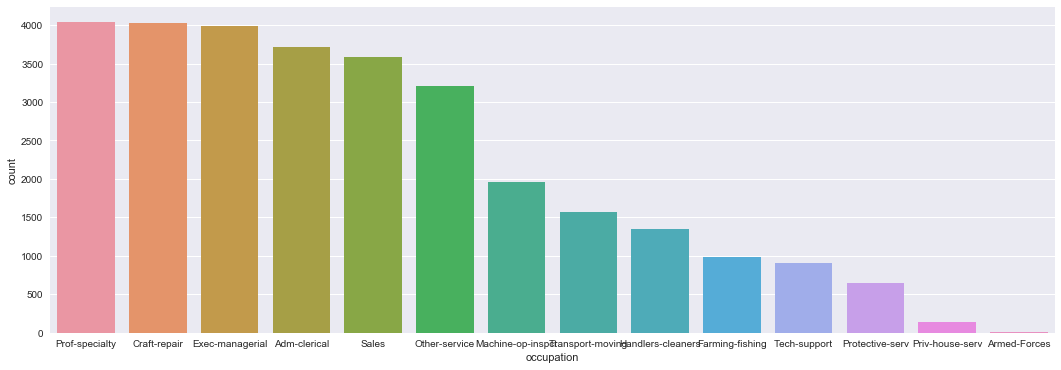

In [80]:
# Expected result:

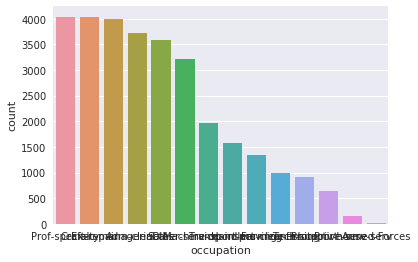

In [60]:
# sns.countplot(data=df, x='occupation')   # THIS IS UNORDERED
sns.countplot(data=df, x='occupation', order=df['occupation'].value_counts().index)

### Exercise: Count per `occupation`

Using grouping and aggregation functions, count how many people are per each occupation:

In [121]:
# Expected output

,count
occupation,
Adm-clerical,3721
Armed-Forces,9
Craft-repair,4030
Exec-managerial,3992
Farming-fishing,989
Handlers-cleaners,1350
Machine-op-inspct,1966
Other-service,3212
Priv-house-serv,143


In [61]:
# easy method, group by occupation
df.groupby('occupation').count()

,age,workclass,fnlwgt,education,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,<=50K,>50K
occupation,,,,,,,,,,,,,,,,
Adm-clerical,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721
Armed-Forces,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Craft-repair,4030,4030,4030,4030,4030,4030,4030,4030,4030,4030,4030,4030,4030,4030,4030,4030
Exec-managerial,3992,3992,3992,3992,3992,3992,3992,3992,3992,3992,3992,3992,3992,3992,3992,3992
Farming-fishing,989,989,989,989,989,989,989,989,989,989,989,989,989,989,989,989
Handlers-cleaners,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350
Machine-op-inspct,1966,1966,1966,1966,1966,1966,1966,1966,1966,1966,1966,1966,1966,1966,1966,1966
Other-service,3212,3212,3212,3212,3212,3212,3212,3212,3212,3212,3212,3212,3212,3212,3212,3212
Priv-house-serv,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143


In [62]:
# DISPLAY ONE COLUMN WITH EASY METHOD
df.groupby('occupation')['age'].count()

occupation
Adm-clerical         3721
Armed-Forces            9
Craft-repair         4030
Exec-managerial      3992
Farming-fishing       989
Handlers-cleaners    1350
Machine-op-inspct    1966
Other-service        3212
Priv-house-serv       143
Prof-specialty       4038
Protective-serv       644
Sales                3584
Tech-support          912
Transport-moving     1572
Name: age, dtype: int64

In [63]:
# really need an explanation for this one
df.groupby('occupation').size().reset_index(name='count').set_index('occupation')

,count
occupation,
Adm-clerical,3721
Armed-Forces,9
Craft-repair,4030
Exec-managerial,3992
Farming-fishing,989
Handlers-cleaners,1350
Machine-op-inspct,1966
Other-service,3212
Priv-house-serv,143


### Exercise: Display capital gains per occupation

Capital gain is defined as _"income from investment sources, apart from wages/salary"_, is basically people generating profits from investments out of their regular job. Show the **average** capital gain per occupation. It should look something like this:

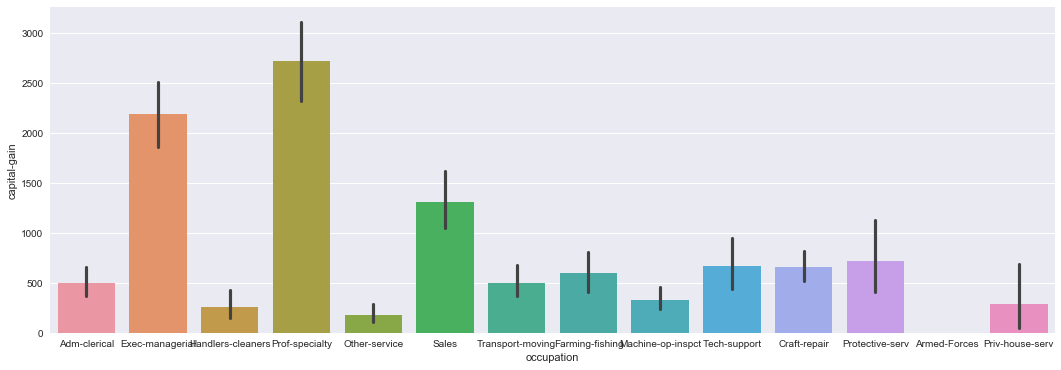

In [83]:
# Expected result:

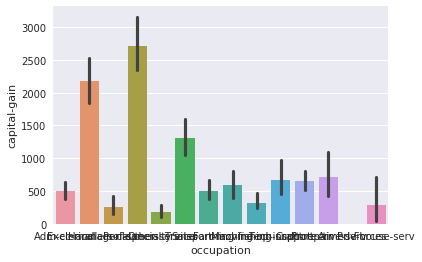

In [64]:
# AVERAGE CAPITAL GAIN PER OCCUPATION
sns.barplot(data=df, x='occupation', y='capital-gain') # NO ESTIMATOR

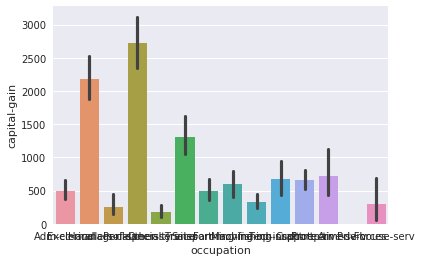

In [65]:
sns.barplot(data=df, x='occupation', y='capital-gain', estimator=np.mean) # what is the difference with no estimator?

### Exercise: Use grouping to obtain the same results as the previous plot

Using grouping functions, generate the same results as the plot above. Expected output:

In [110]:
# Expected result

occupation
Adm-clerical          497.097286
Armed-Forces            0.000000
Craft-repair          657.586849
Exec-managerial      2185.330912
Farming-fishing       592.707786
Handlers-cleaners     258.140000
Machine-op-inspct     323.825025
Other-service         181.705479
Priv-house-serv       291.594406
Prof-specialty       2717.880139
Protective-serv       713.596273
Sales                1308.637835
Tech-support          668.105263
Transport-moving      498.121501
Name: capital-gain, dtype: float64

In [66]:
df['capital-gain'].groupby(df['occupation']).aggregate(np.mean) # aggregate to get the mean data

occupation
Adm-clerical          497.097286
Armed-Forces            0.000000
Craft-repair          657.586849
Exec-managerial      2185.330912
Farming-fishing       592.707786
Handlers-cleaners     258.140000
Machine-op-inspct     323.825025
Other-service         181.705479
Priv-house-serv       291.594406
Prof-specialty       2717.880139
Protective-serv       713.596273
Sales                1308.637835
Tech-support          668.105263
Transport-moving      498.121501
Name: capital-gain, dtype: float64

In [67]:
# rechecking the data
df['capital-gain'].groupby(df['occupation']) # just an object, huh

In [68]:
df['capital-gain'].groupby(df['occupation']).head() # not quite what I was thinking

0         2174
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8        14084
9         5178
10           0
11           0
12           0
13           0
15           0
16           0
17           0
18           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
29           0
30           0
31           0
33           0
34           0
         ...  
55           0
57           0
60        2407
62           0
64           0
65           0
71           0
75           0
79           0
84       14344
86           0
94           0
95           0
107          0
145          0
167          0
171          0
195          0
227       1409
255          0
442          0
536          0
622          0
929          0
1038         0
1300         0
2065         0
14613        0
16111        0
18034        0
Name: capital-gain, Length: 70, dtype: int64

### Exercise: Bar plot: average capital gain per race and group

Create a bar plot that shows in that has `race` as the X axis, a `sex` hue and displays the average capital gain for each group. Expected output:

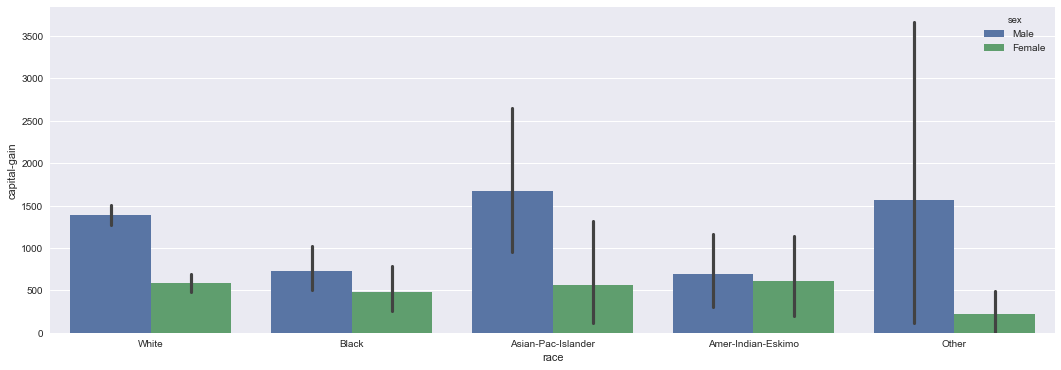

In [89]:
# Expected output

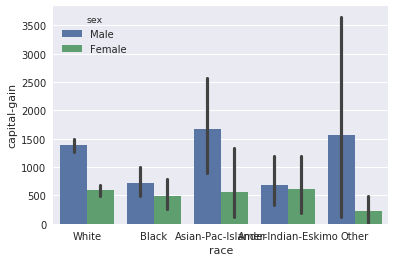

In [69]:
# hue gives you that categorical sex divider in the plotting
sns.barplot(data=df, x='race', y='capital-gain', hue='sex', estimator=np.mean)

### Exercise: Use grouping to obtain the same results as the previous plot

Use group functions to generate the values plotted above. You're basically grouping by `race` and `sex` and computing the average capital gain per group.

In [92]:
# Expected output

race                sex   
Amer-Indian-Eskimo  Female     605.682243
                    Male       692.932961
Asian-Pac-Islander  Female     564.204082
                    Male      1666.455907
Black               Female     484.871337
                    Male       722.966855
Other               Female     223.873563
                    Male      1566.208333
White               Female     588.850285
                    Male      1385.042466
Name: capital-gain, dtype: float64

In [70]:
# look at capital gain data and group by race and sex to get a numerical representation 
df['capital-gain'].groupby([df['race'], df['sex']]).mean()

race                sex   
Amer-Indian-Eskimo  Female     605.682243
                    Male       692.932961
Asian-Pac-Islander  Female     564.204082
                    Male      1666.455907
Black               Female     484.871337
                    Male       722.966855
Other               Female     223.873563
                    Male      1566.208333
White               Female     588.850285
                    Male      1385.042466
Name: capital-gain, dtype: float64

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)